In [11]:
#To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
#download nltk resources
nltk.download('punkt',quiet=True)  #To ignore msg quite=True
nltk.download('stopwords',quiet=True)

data=pd.read_csv('Amazon-Product-Reviews.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [17]:
#pre process-data
#handle missing values
data.dropna(inplace=True)

#map sentiments to binary values
data['Sentiment']=data['Sentiment'].apply(lambda x:0 if x<=3 else 1)

#preprocess text: clean reviews by removing stopwords
stop_words=set(stopwords.words('english'))

In [19]:
#filter and join words
def clean_review(review):
    tokens=word_tokenize(str(review).lower())
    filtered_words=[word for word in tokens if word.isalpha() and word not in stop_words]
    return ''.join(filtered_words)
data['Review']=data['Review'].apply(clean_review)

In [20]:
#display distribution (display the distribution of sentiment classes)
print(data['Sentiment'].value_counts())

Sentiment
0    15000
1     9999
Name: count, dtype: int64


In [27]:
def plot_wordcloud(sentiment, title):
    reviews = ' '.join(data.loc[data['Sentiment'] == sentiment, 'Review'])
    wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110).generate(reviews)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

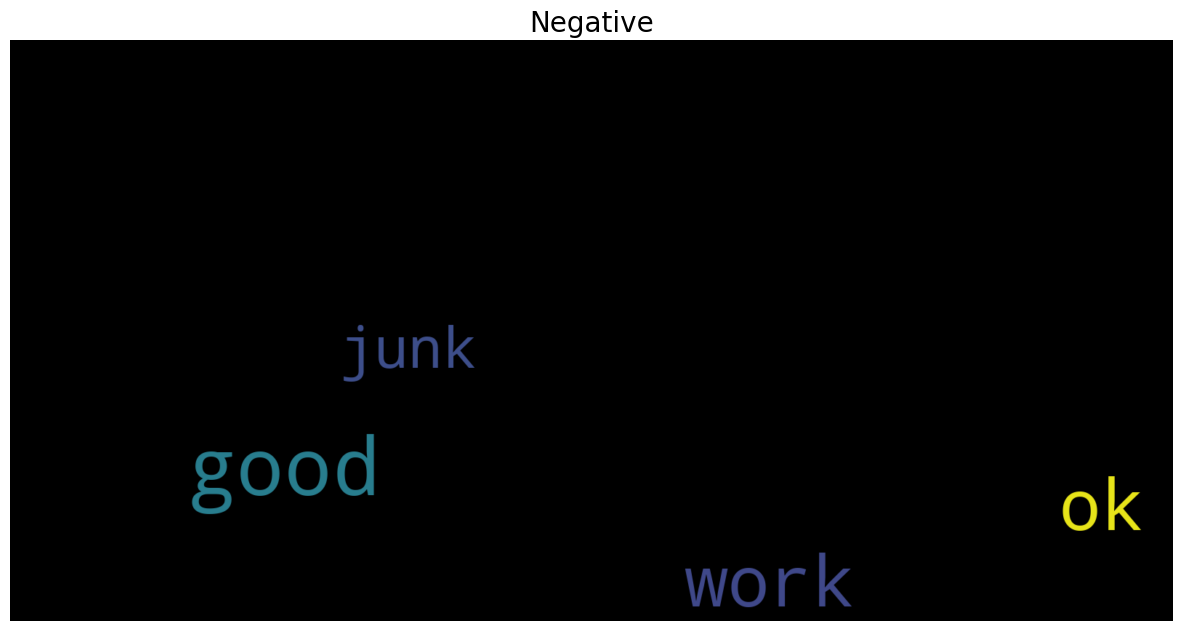

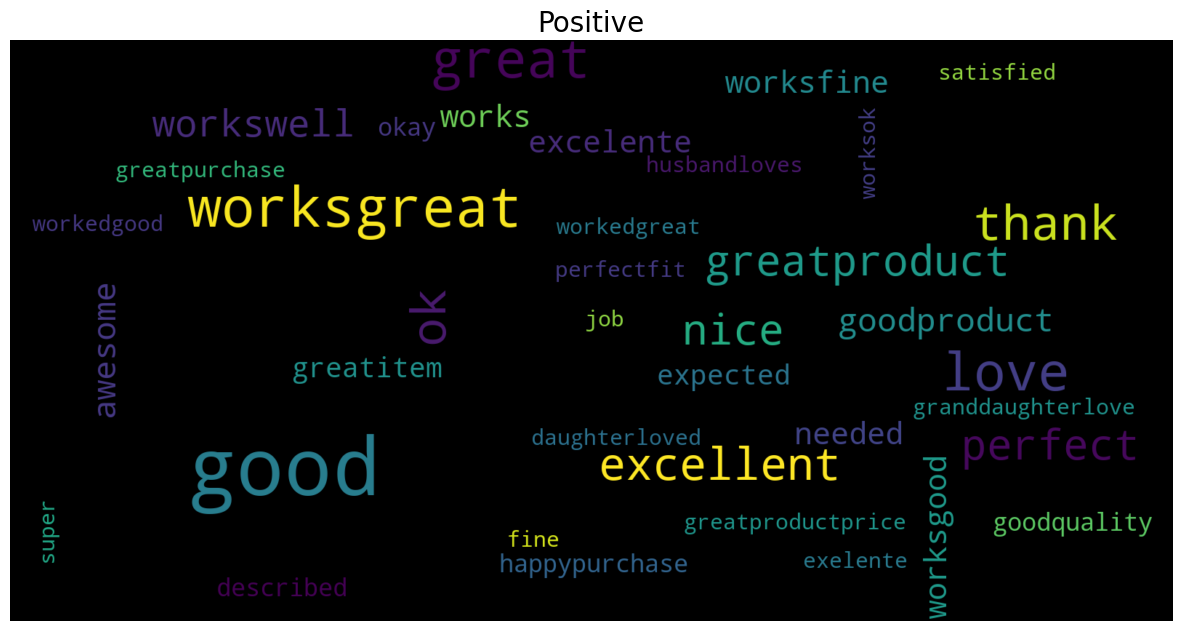

In [29]:
plot_wordcloud(0,'Negative')
plot_wordcloud(1,'Positive')